### 导入必要的BenchMark测试库

In [8]:
from Apps.GPUClient.VideoProcessorGPU import VideoProcessor as vpg
from Apps.PureCPUClient.VideoProcessorCPUCV import VideoProcessor as vpc
from tqdm.autonotebook import tqdm
import pathlib
import cv2
import ffmpegcv as ffcv
import time

### 加载图像（使用非DALI的方式）

In [3]:
images = list(pathlib.Path("./Student_Behavior-1/train/images/").glob("*.jpg"))

### 启动Triton推理服务

In [4]:
!sudo bash ./runDocker.sh

### 在CPU管道上执行任务

In [5]:
cpuClient = vpc()

In [10]:
print("Executing CPU Tasks..")
start  = time.time()
with tqdm(total=len(images)) as pbar:
    for i in images:
        pbar.set_description(f"Executing files {i}")
        img = cv2.imread(str(i))
        try:
            cpuClient.processing(img)
        except:
            pass
        pbar.update(1)
end = time.time()

fps = len(images)/(end-start)
print(f"CPU FPS: {round(fps,2)}")

Executing CPU Tasks..


  0%|          | 0/195 [00:00<?, ?it/s]

CPU FPS: 13.6


### 在GPU管道上执行任务

In [11]:
gpuClient = vpg()

In [14]:
print("Executing GPU Tasks..")
start  = time.time()
with tqdm(total=len(images)) as pbar:
    for i in images:
        pbar.set_description(f"Executing files {i}")
        img = cv2.imread(str(i))
        try:
            gpuClient.processing(img)
        except:
            pass
        pbar.update(1)
end = time.time()

fps = len(images)/(end-start)
print(f"GPU FPS: {round(fps,2)}")

Executing GPU Tasks..


  0%|          | 0/195 [00:00<?, ?it/s]

GPU FPS: 202.99


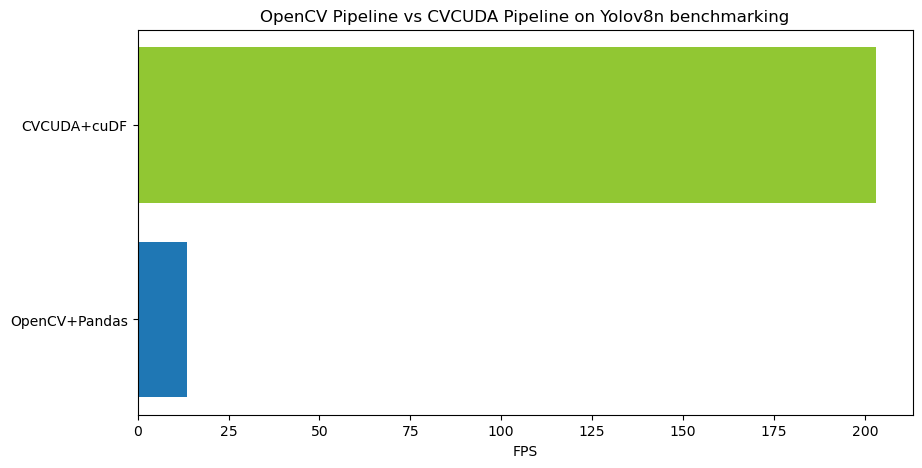

In [25]:
import matplotlib.pyplot as plt

x = ["OpenCV+Pandas", "CVCUDA+cuDF"]
y = [13.6,202.99]
plt.figure(figsize=(10,5))
plt.title("OpenCV Pipeline vs CVCUDA Pipeline on Yolov8n benchmarking")
plt.xlabel("FPS")
plt.barh(x[0],y[0])
plt.barh(x[1],y[1],color="#91C733")
plt.savefig("Benchmark.png",dpi=300)
plt.show()
